<a href="https://colab.research.google.com/github/mrpintime/World_Happiness/blob/main/WorldHappinessSegmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# World Happiness

---

Created by Moein

# Dataset Descriptions

## Context

The World Happiness Report is a landmark survey of the state of global happiness. The first report was published in 2012, the second in 2013, the third in 2015, and the fourth in the 2016 Update. The World Happiness 2017, which ranks 155 countries by their happiness levels, was released at the United Nations at an event celebrating International Day of Happiness on March 20th. The report continues to gain global recognition as governments, organizations and civil society increasingly use happiness indicators to inform their policy-making decisions. Leading experts across fields – economics, psychology, survey analysis, national statistics, health, public policy and more – describe how measurements of well-being can be used effectively to assess the progress of nations. The reports review the state of happiness in the world today and show how the new science of happiness explains personal and national variations in happiness.

## Content

The happiness scores and rankings use data from the Gallup World Poll. The scores are based on answers to the main life evaluation question asked in the poll. This question, known as the Cantril ladder, asks respondents to think of a ladder with the best possible life for them being a 10 and the worst possible life being a 0 and to rate their own current lives on that scale. The scores are from nationally representative samples for the years 2013-2016 and use the Gallup weights to make the estimates representative. The columns following the happiness score estimate the extent to which each of six factors – **economic production, social support, life expectancy, freedom, absence of corruption, and generosity** – contribute to making life evaluations higher in each country than they are in Dystopia, a hypothetical country that has values equal to the world’s lowest national averages for each of the six factors. They have no impact on the total score reported for each country, but they do explain why some countries rank higher than others.

## What is Dystopia?

Dystopia is an imaginary country that has the world’s least-happy people. The purpose in establishing Dystopia is to have a benchmark against which all countries can be favorably compared (no country performs more poorly than Dystopia) in terms of each of the six key variables, thus allowing each sub-bar to be of positive width. The lowest scores observed for the six key variables, therefore, characterize Dystopia. Since life would be very unpleasant in a country with the world’s lowest incomes, lowest life expectancy, lowest generosity, most corruption, least freedom and least social support, **it is referred to as “Dystopia,” in contrast to Utopia.**

## What do the columns succeeding the Happiness Score(like Family, Generosity, etc.) describe?

The following columns: GDP per Capita, Family, Life Expectancy, Freedom, Generosity, Trust Government Corruption describe the extent to which these factors contribute in evaluating the happiness in each country.
The Dystopia Residual metric actually is the Dystopia Happiness Score(1.85) + the Residual value or the unexplained value for each country as stated in the previous answer.

If you add all these factors up, you get the happiness score so it might be un-reliable to model them to predict Happiness Scores.

## Distribution of Features

![Distribution](https://raw.githubusercontent.com/mrpintime/World_Happiness/main/imgs/dist.png)

# Objective

Our object is to investigate the dataset and its features by unsupervised machine learning and data science techniques to find and reveal relation and structures that can show us the underlying pattern of this dataset (World Happiness).  

---

**Note**: We knoe that we can not expected our data to show us that countries with high score are surely best countries for living because This dataset contained only 6 factors and these 6 factors can not explain all parts and causes of happiness.  

# Preparing Notebook

In [ ]:
import pandas as pd, seaborn as sns, numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN, MeanShift, estimate_bandwidth
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.manifold import TSNE

In [ ]:
import warnings

def warns_ignore(*args, **kwargs):
  pass

warnings.warn = warns_ignore

# Data Wrangling

Import dataset related to 2019

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/WorldHappinessS/2019.csv")

In [ ]:
df.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [ ]:
# check if Overall rank is unique or not

df[['Overall rank']].duplicated().sum()

0

In [ ]:
# set overal rank as index

df = df.set_index('Overall rank')

# EDA

In [ ]:
# check null value

df.isnull().sum()

Country or region               0
Score                           0
GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       0
dtype: int64

In [ ]:
# descriptive statistics

df.describe()

,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,5.407096,0.905147,1.208814,0.725244,0.392571,0.184846,0.110603
std,1.113120,0.398389,0.299191,0.242124,0.143289,0.095254,0.094538
min,2.853000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.544500,0.602750,1.055750,0.547750,0.308000,0.108750,0.047000
50%,5.379500,0.960000,1.271500,0.789000,0.417000,0.177500,0.085500
75%,6.184500,1.232500,1.452500,0.881750,0.507250,0.248250,0.141250
max,7.769000,1.684000,1.624000,1.141000,0.631000,0.566000,0.453000


1. Mean and STD parameters for features except `score` is between 0-1.  
2. We can see the minimum score is **2.85** that is **1** unit higher than hypothetical country (Dystopia) and maximum is **7.77** that is **5.98** units higher that The hypothetical country (Dystopia).
3. we have zero value for all features except `score` feature


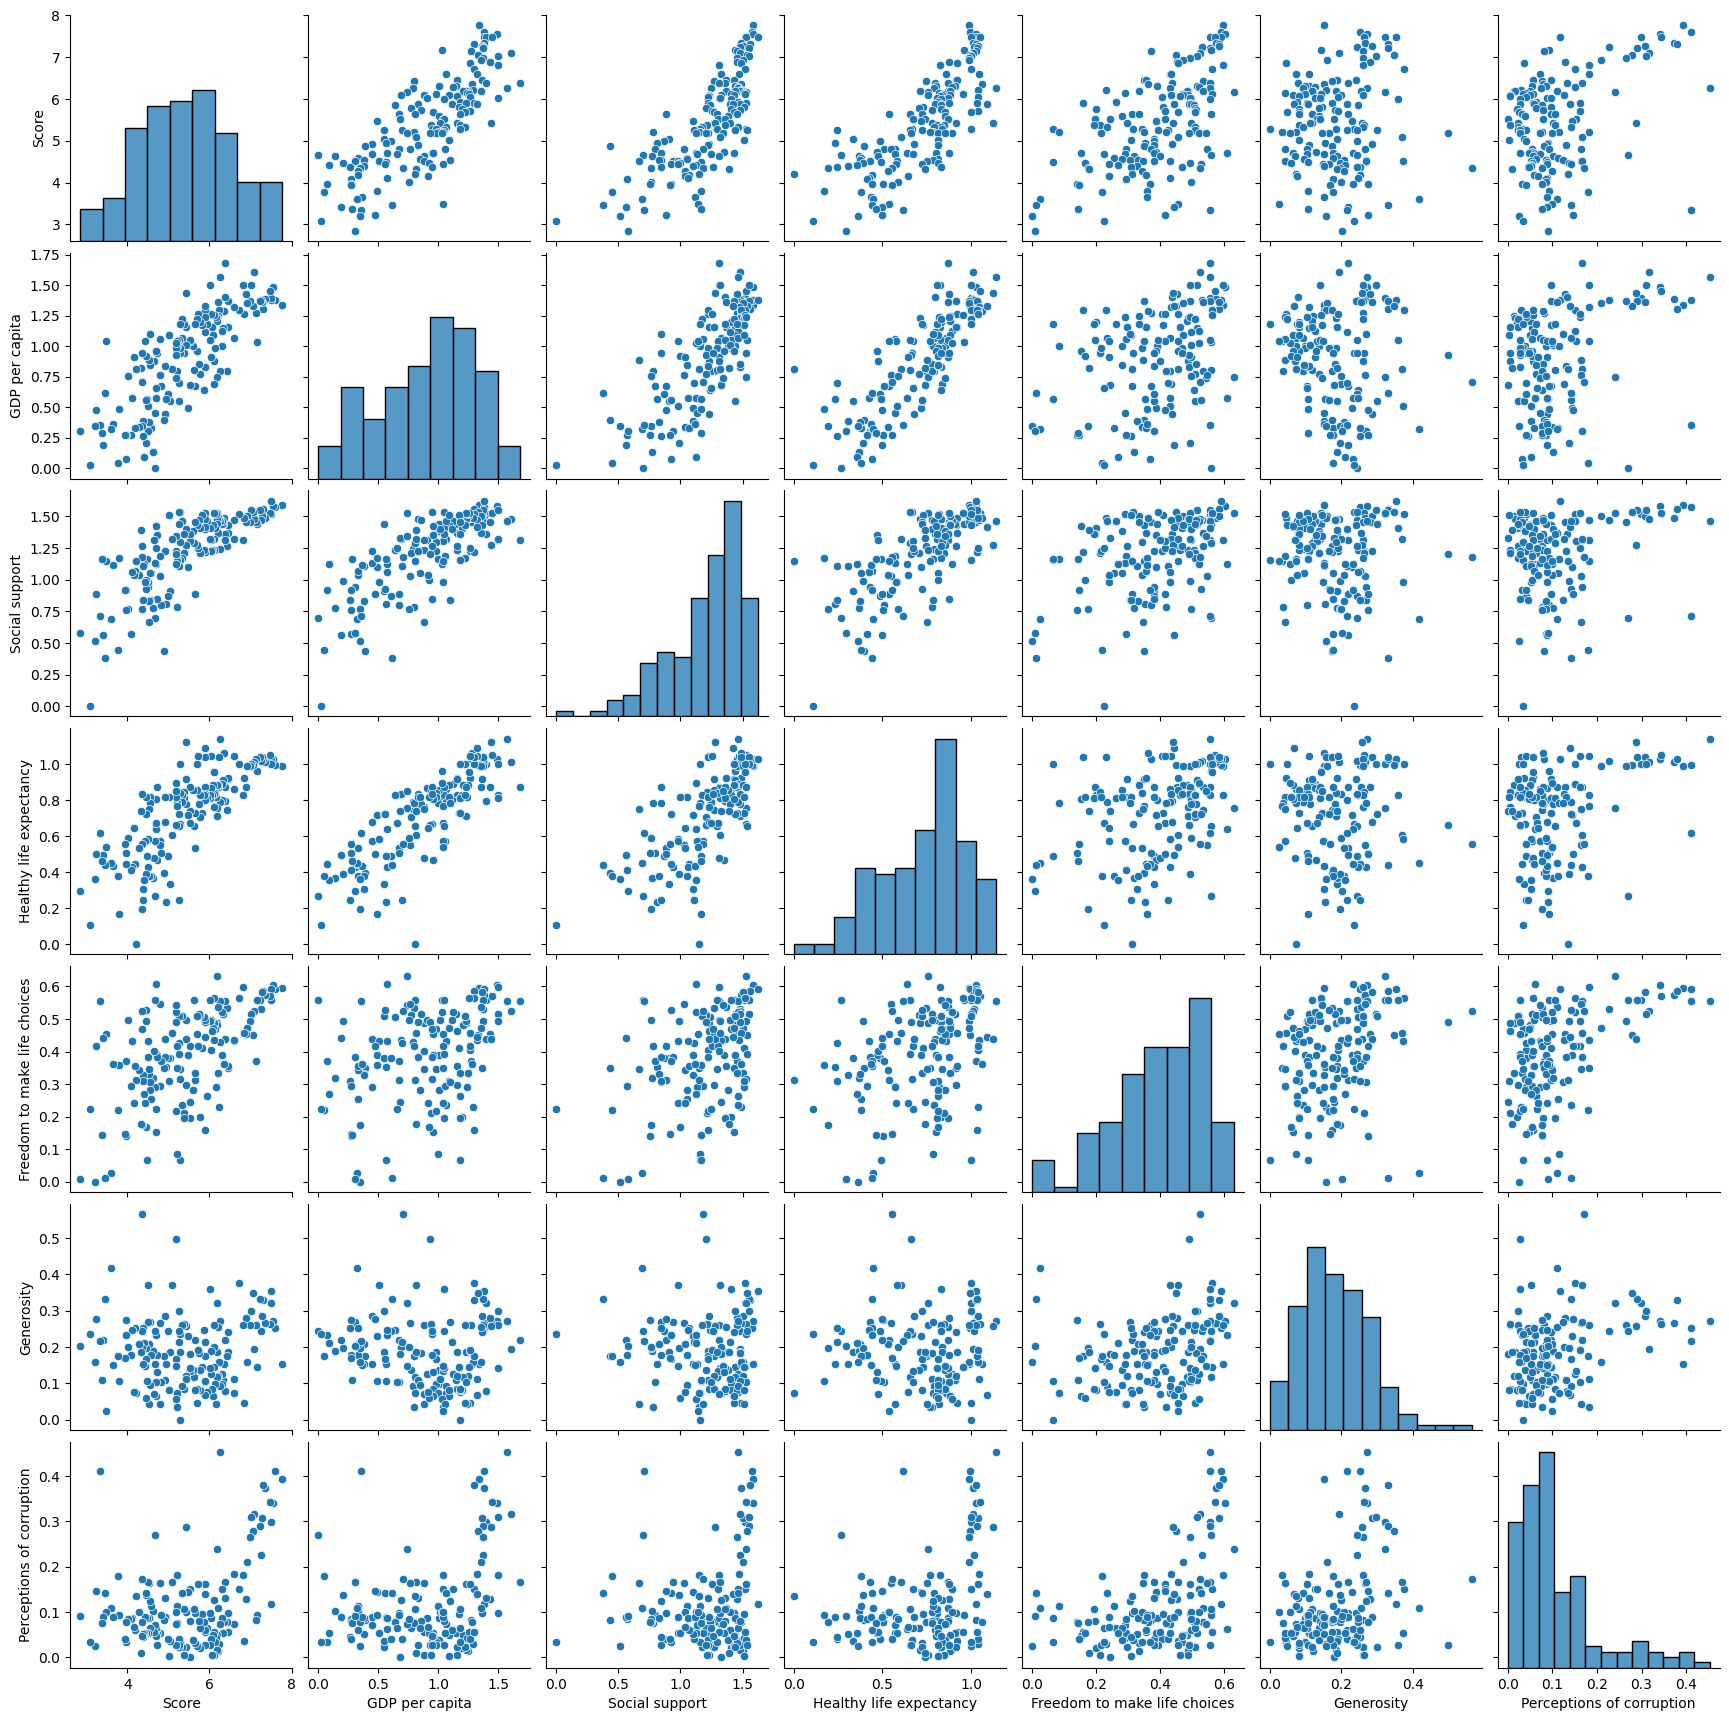

In [ ]:
# Pair plot

sns.pairplot(df)

1. We can see there is significant positive relation in graph of `score`, `GDP per capita`, `Healthy life expectancy`, `social support` features.

2. Except `score` and `GDP per capita` all others features have skewed distribution.

3. We can see `Healthy life expectancy`, `social support` and `Freedom to make life choices` are left skewed it means that usually we have high values for these features in dataset

4. `Perceptions of corruption` and  `Generosity` have right skewed and it means we generally have lower values for these features.

<Axes: >

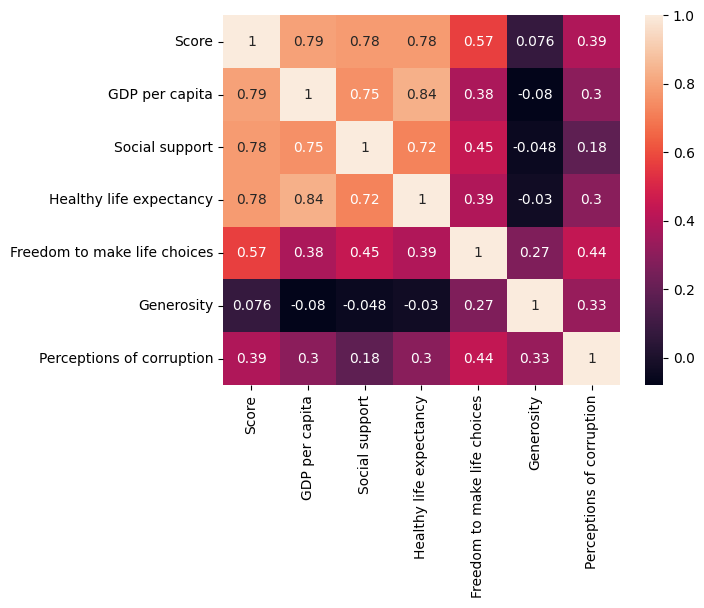

In [ ]:
sns.heatmap(df.corr(), annot=True)

we can see features of top of the square have good significant realation with together.

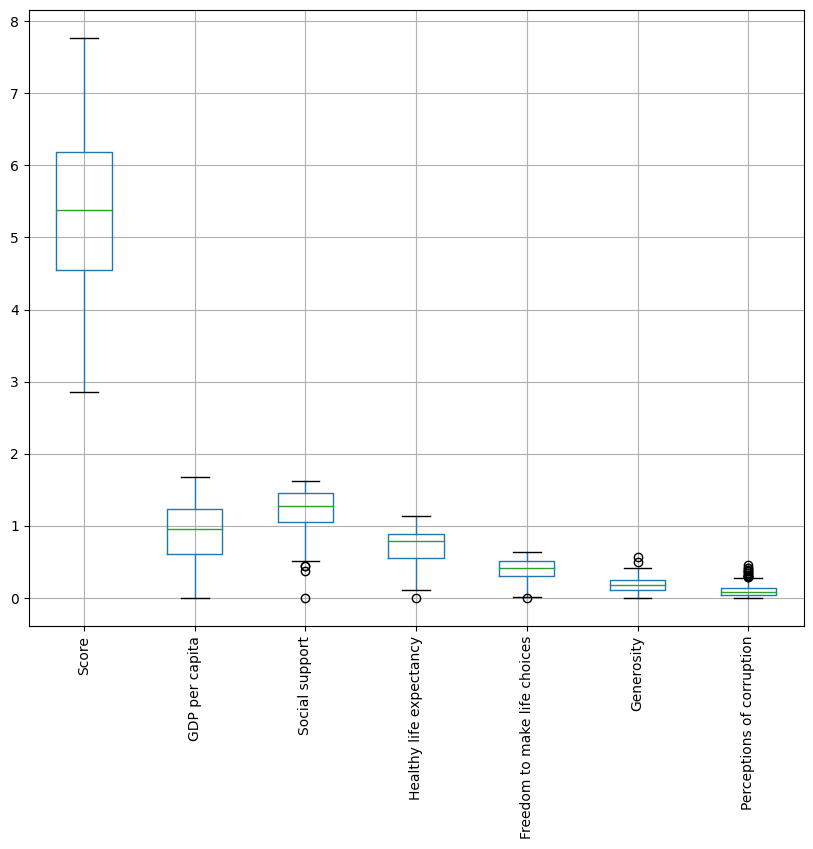

In [ ]:
plt.figure(figsize=(10,8))
df.boxplot()
plt.xticks(rotation=90)
plt.show()

As we can see there are some values that show thamselves as outlier in box plot but for confirmation after we look at the scatter plot they do not seem to be outlier.  
**Note**: we can check these with Standard scaler as well.

In [ ]:
scaler = StandardScaler()

scaled_df = scaler.fit_transform(df.drop(columns=['Country or region']))

cls = [x for x in df.columns if x!= 'Country or region']
scl_df = pd.DataFrame(scaled_df, columns=cls)

scl_df.describe().round(2)

,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,156.00,156.00,156.00,156.00,156.00,156.00,156.00
mean,-0.00,-0.00,-0.00,-0.00,-0.00,0.00,-0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-2.30,-2.28,-4.05,-3.00,-2.75,-1.95,-1.17
25%,-0.78,-0.76,-0.51,-0.74,-0.59,-0.80,-0.67
50%,-0.02,0.14,0.21,0.26,0.17,-0.08,-0.27
75%,0.70,0.82,0.82,0.65,0.80,0.67,0.33
max,2.13,1.96,1.39,1.72,1.67,4.01,3.63


by a general hypothetical we say if we have a record bigger that 3 or lower that -3 in zscore scaled that record will consider as an outlier by this definition `Social support`, `Generosity` and `Perceptions of corruption` have oulier/s.

In [ ]:
scl_df[(scl_df.Generosity > 3) | (scl_df['Social support'] < -3) | (scl_df['Perceptions of corruption'] > 3)]

,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
1,1.976397,1.203324,1.221154,1.121857,1.396277,0.707265,3.177158
33,0.770498,1.679262,0.852312,1.722652,1.144228,0.907373,3.633468
91,-0.193860,0.065102,-0.019495,-0.270331,0.689140,3.298139,-0.876565
130,-0.943715,-0.491418,-0.093264,-0.705390,0.927186,4.014316,0.651540
151,-1.868418,-1.375303,-1.669224,-0.460929,1.137227,0.338645,3.187770
154,-2.094636,-2.213861,-4.053282,-2.569928,-1.173221,0.528221,-0.802283


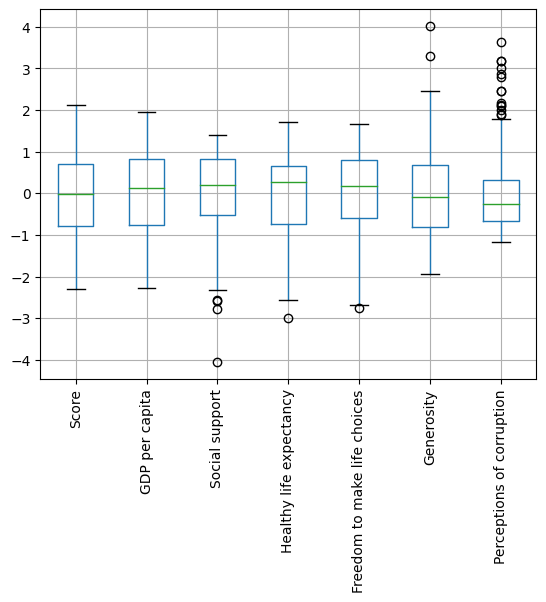

In [ ]:
scl_df.boxplot()
plt.xticks(rotation=90)
plt.show()

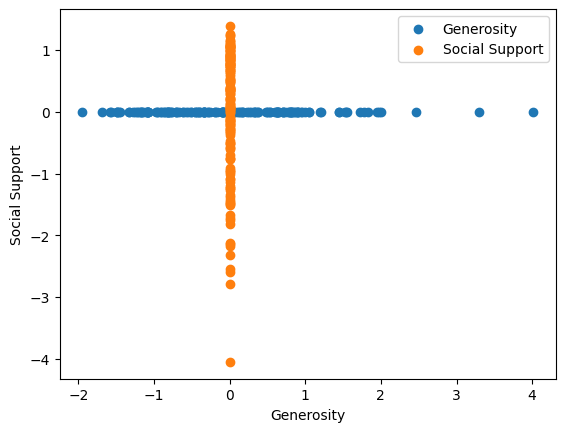

In [ ]:
plt.scatter(scl_df.Generosity, np.zeros(scl_df.shape[0]), label='Generosity')
plt.scatter(y=scl_df['Social support'], x=np.zeros(scl_df.shape[0]), label='Social Support')

plt.xlabel('Generosity')
plt.ylabel('Social Support')
plt.legend(loc='best')
plt.show()

we have just 6 records that show themselves as outliers but we should always look at the graph for more confidence and also purpose of our analysis.

---

**By considering our purpose of analysis and graph we do not remove these 6 records from dataset. one reason is that we want to find how clustering algorithm like DBSCAN will be well on finding outliers**

<Axes: xlabel='Country or region', ylabel='Score'>

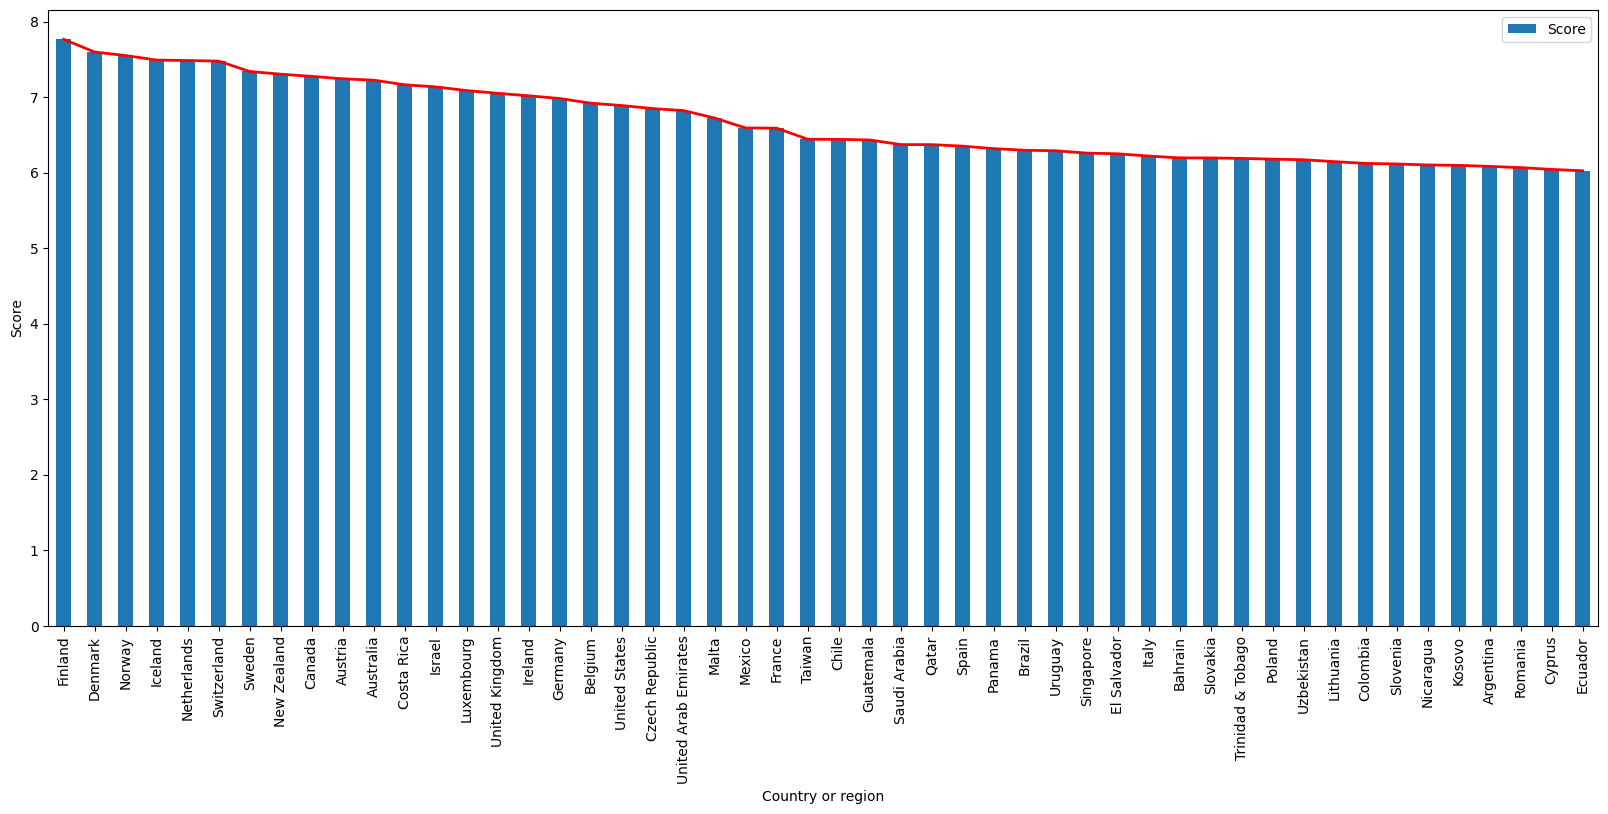

In [ ]:
top50 = df.head(50)
top50.plot.bar(y='Score', x='Country or region', figsize=(20,8))
sns.lineplot(data=top50, y='Score', x='Country or region', color='red', linewidth=2)

1. between top countries we can see many european countries.
2. 4 top countries are northern countries of europ.
3. we can see an elbow point at `Mexico` and `France` bar chart.

# Clustering

In [ ]:
paese = df['Country or region']
X = df.drop(columns='Country or region')

## TSNE

We want to do TSNE for visualization of our data after clustering

In [ ]:
# visulize data with PCA
tsne = TSNE()

tsne_trans = tsne.fit_transform(X)

tsne_df = pd.DataFrame(tsne_trans, columns=['embedd_1','embedd_2'])


Text(0.5, 1.0, 'TSNE Embedding')

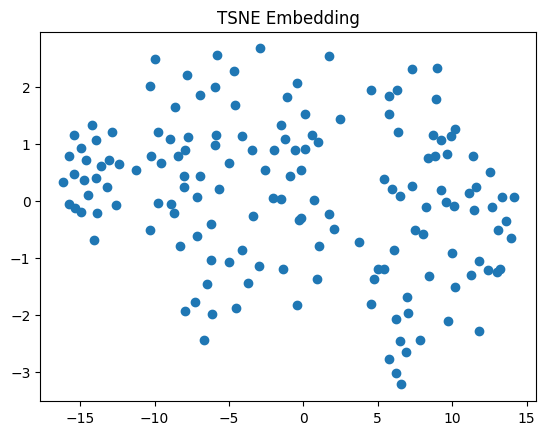

In [ ]:
plt.scatter(x=tsne_df.embedd_1, y=tsne_df.embedd_2)
plt.title('TSNE Embedding')

## Kmeans

In [ ]:
inertia_lst = []
silhouette_lst = []
k = range(2, 21)
for i in k:
  km = KMeans(n_clusters=i)
  km.fit(X)
  inertia_lst.append(km.inertia_)
  silhouette_lst.append(silhouette_score(X, km.labels_))

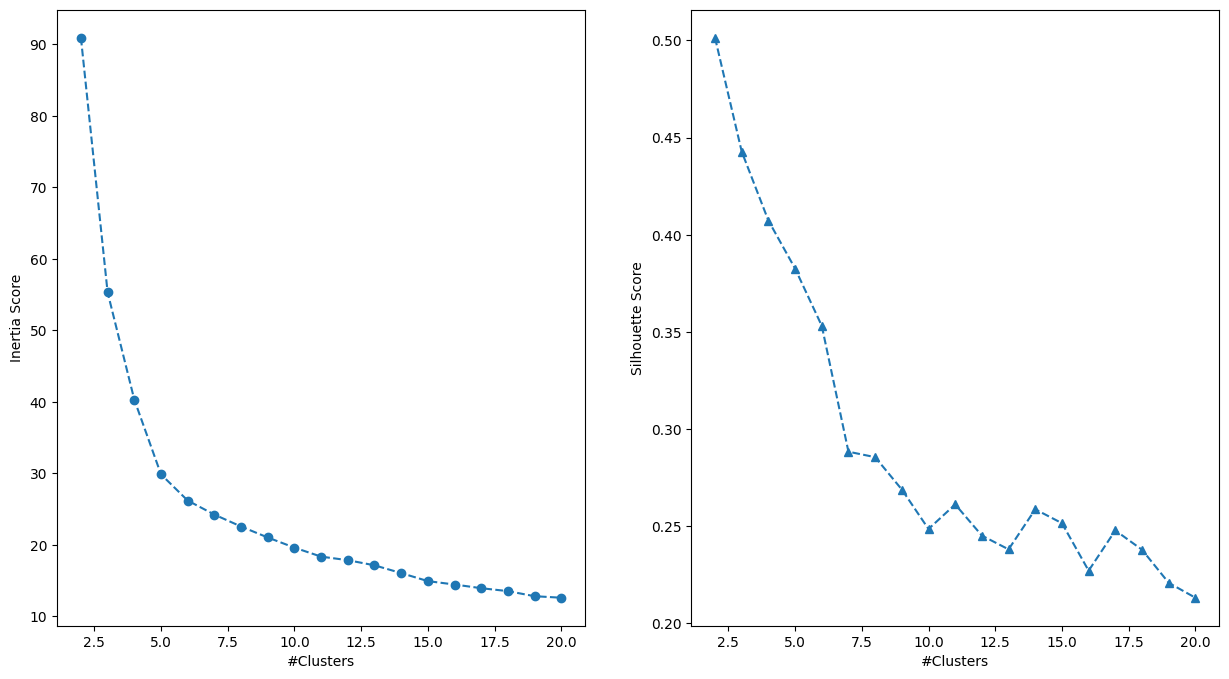

In [ ]:
fig, ax = plt.subplots(1,2)
fig.set_figheight(8)
fig.set_figwidth(15)

ax[0].plot(k, inertia_lst, marker='o', ls='--')
ax[0].set_xlabel('#Clusters')
ax[0].set_ylabel('Inertia Score')

ax[1].plot(k, silhouette_lst, marker='^', ls='--')
ax[1].set_xlabel('#Clusters')
ax[1].set_ylabel('Silhouette Score')
plt.show()

With elbow method we can see we probably have 7 or 8 clusters inside of our dataset.

---

We examine best fit number of clusters with Silhouette and Inertia Scoer.  
1. we can see the jump in 7 and 8 clusters.
2. we see high score of Silhouette is 2 because it is just 2 clusters because of this we compare it with inertia score.
3. lower score (near to zero) in Silhouette more overlap in clusters we have.

In [ ]:
km = KMeans(n_clusters=8)
km.fit(X)

KMeans()

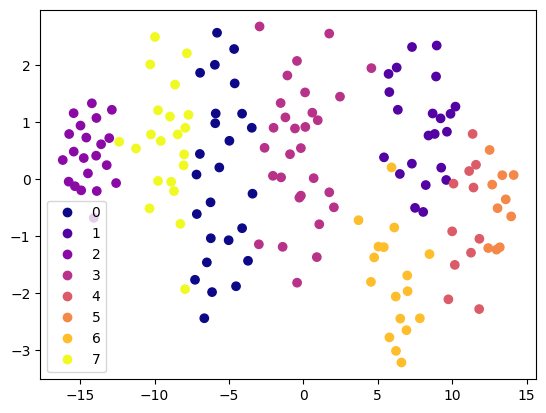

In [ ]:
sct = plt.scatter(x=tsne_df.embedd_1, y=tsne_df.embedd_2, c=km.labels_, cmap='plasma')
plt.legend(handles=sct.legend_elements()[0], labels=list(np.unique(km.labels_).astype('str')))

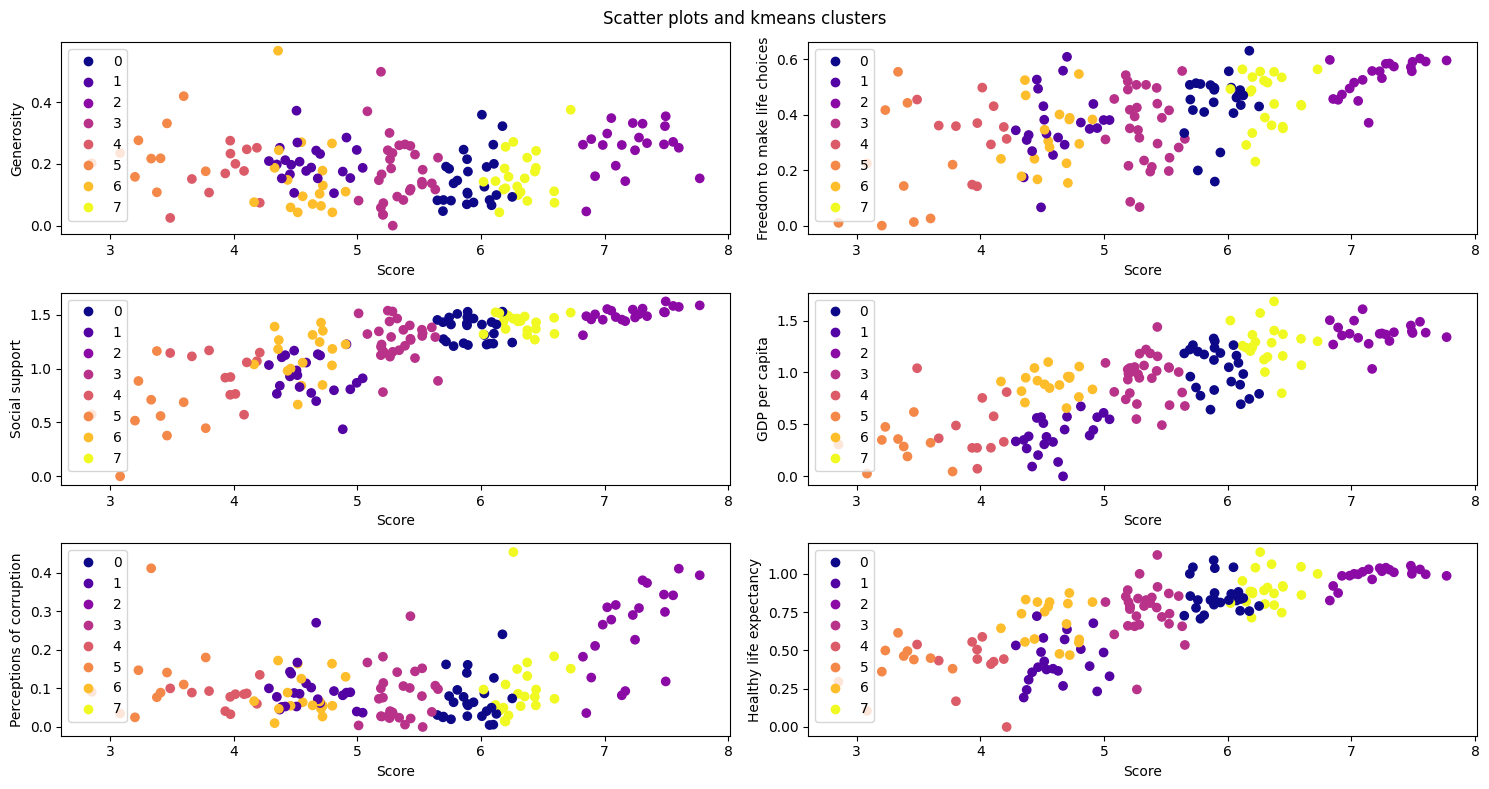

In [ ]:
fig, ax = plt.subplots(3,2)

fig.set_figheight(8)
fig.set_figwidth(15)

fig.suptitle('Scatter plots and kmeans clusters')

sct = ax[0, 0].scatter(x=X.Score, y=X.Generosity, c=km.labels_, cmap='plasma')
ax[0, 0].legend(handles=sct.legend_elements()[0], labels=list(np.unique(km.labels_).astype('str')))
ax[0, 0].set(xlabel='Score',ylabel='Generosity')

sct = ax[0, 1].scatter(x=X.Score, y=X['Freedom to make life choices'], c=km.labels_, cmap='plasma')
ax[0, 1].legend(handles=sct.legend_elements()[0], labels=list(np.unique(km.labels_).astype('str')))
ax[0, 1].set(xlabel='Score', ylabel='Freedom to make life choices')

sct = ax[1, 0].scatter(x=X.Score, y=X['Social support'], c=km.labels_, cmap='plasma')
ax[1, 0].legend(handles=sct.legend_elements()[0], labels=list(np.unique(km.labels_).astype('str')))
ax[1, 0].set(xlabel='Score', ylabel='Social support')

sct = ax[1, 1].scatter(x=X.Score, y=X['GDP per capita'], c=km.labels_, cmap='plasma')
ax[1, 1].legend(handles=sct.legend_elements()[0], labels=list(np.unique(km.labels_).astype('str')))
ax[1, 1].set(xlabel='Score', ylabel='GDP per capita')

sct = ax[2, 0].scatter(x=X.Score, y=X['Perceptions of corruption'], c=km.labels_, cmap='plasma')
ax[2, 0].legend(handles=sct.legend_elements()[0], labels=list(np.unique(km.labels_).astype('str')))
ax[2, 0].set(xlabel='Score', ylabel='Perceptions of corruption')

sct = ax[2, 1].scatter(x=X.Score, y=X['Healthy life expectancy'], c=km.labels_, cmap='plasma')
ax[2, 1].legend(handles=sct.legend_elements()[0], labels=list(np.unique(km.labels_).astype('str')))
ax[2, 1].set(xlabel='Score', ylabel='Healthy life expectancy')

plt.tight_layout()


## DBSCAN

In [ ]:
dbs = DBSCAN(eps=0.33, min_samples=4)
dbs.fit(X)

DBSCAN(eps=0.33, min_samples=4)

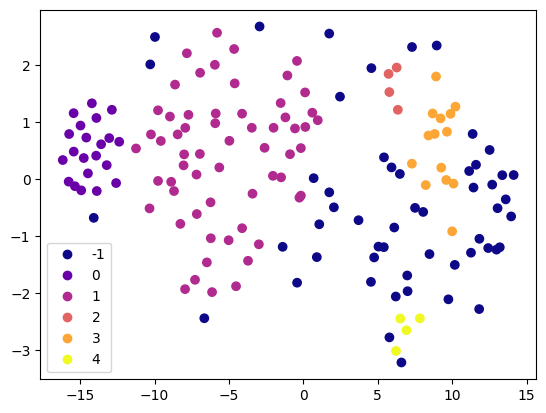

In [ ]:
sct = plt.scatter(x=tsne_df.embedd_1, y=tsne_df.embedd_2, c=dbs.labels_, cmap='plasma')
plt.legend(handles=sct.legend_elements()[0], labels=list(np.unique(dbs.labels_).astype('str')))

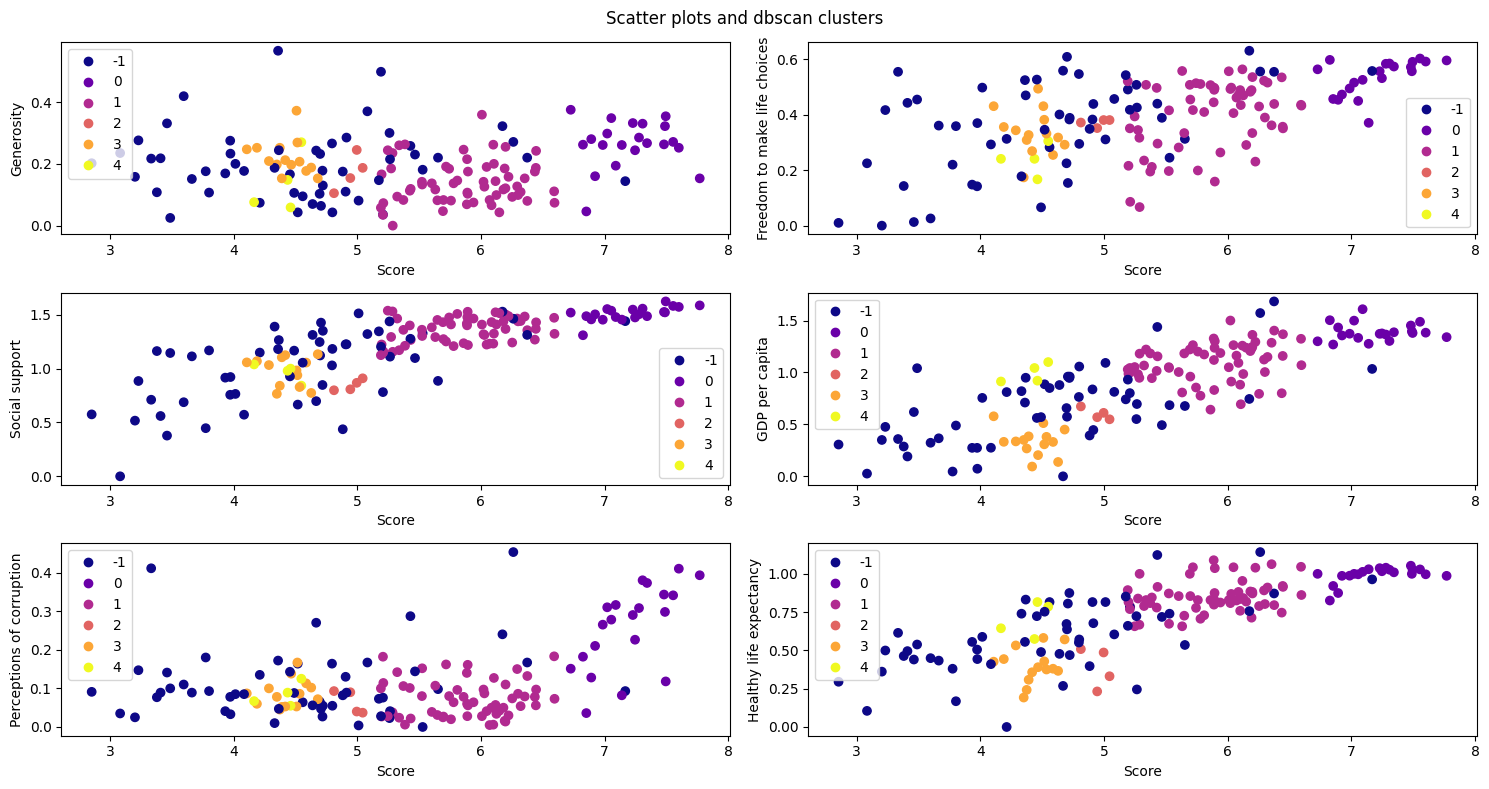

In [ ]:
fig, ax = plt.subplots(3,2)

fig.set_figheight(8)
fig.set_figwidth(15)

fig.suptitle('Scatter plots and dbscan clusters')

sct = ax[0, 0].scatter(x=X.Score, y=X.Generosity, c=dbs.labels_, cmap='plasma')
ax[0, 0].legend(handles=sct.legend_elements()[0], labels=list(np.unique(dbs.labels_).astype('str')))
ax[0, 0].set(xlabel='Score', ylabel='Generosity')

sct = ax[0, 1].scatter(x=X.Score, y=X['Freedom to make life choices'], c=dbs.labels_, cmap='plasma')
ax[0, 1].legend(handles=sct.legend_elements()[0], labels=list(np.unique(dbs.labels_).astype('str')))
ax[0, 1].set(xlabel='Score', ylabel='Freedom to make life choices')

sct = ax[1, 0].scatter(x=X.Score, y=X['Social support'], c=dbs.labels_, cmap='plasma')
ax[1, 0].legend(handles=sct.legend_elements()[0], labels=list(np.unique(dbs.labels_).astype('str')))
ax[1, 0].set(xlabel='Score', ylabel='Social support')

sct = ax[1, 1].scatter(x=X.Score, y=X['GDP per capita'], c=dbs.labels_, cmap='plasma')
ax[1, 1].legend(handles=sct.legend_elements()[0], labels=list(np.unique(dbs.labels_).astype('str')))
ax[1, 1].set(xlabel='Score', ylabel='GDP per capita')

sct = ax[2, 0].scatter(x=X.Score, y=X['Perceptions of corruption'], c=dbs.labels_, cmap='plasma')
ax[2, 0].legend(handles=sct.legend_elements()[0], labels=list(np.unique(dbs.labels_).astype('str')))
ax[2, 0].set(xlabel='Score', ylabel='Perceptions of corruption')

sct = ax[2, 1].scatter(x=X.Score, y=X['Healthy life expectancy'], c=dbs.labels_, cmap='plasma')
ax[2, 1].legend(handles=sct.legend_elements()[0], labels=list(np.unique(dbs.labels_).astype('str')))
ax[2, 1].set(xlabel='Score', ylabel='Healthy life expectancy')

plt.tight_layout()


## Meanshift

In [ ]:
est_bnd = estimate_bandwidth(X=X, quantile=0.2)

In [ ]:
mshift = MeanShift(bandwidth=est_bnd, bin_seeding=True)
mshift.fit(X)

MeanShift(bandwidth=0.7523601493413729, bin_seeding=True)

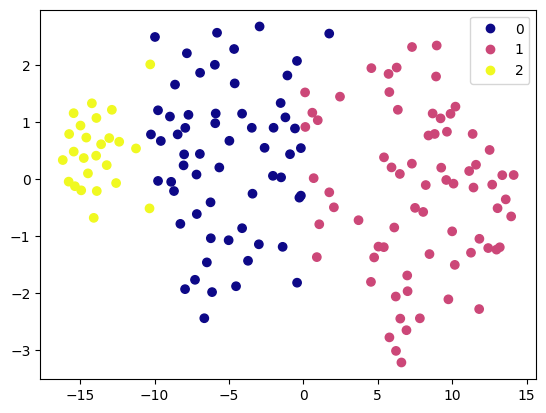

In [ ]:
sct = plt.scatter(x=tsne_df.embedd_1, y=tsne_df.embedd_2, c=mshift.labels_, cmap='plasma')
plt.legend(handles=sct.legend_elements()[0], labels=list(np.unique(mshift.labels_).astype('str')))


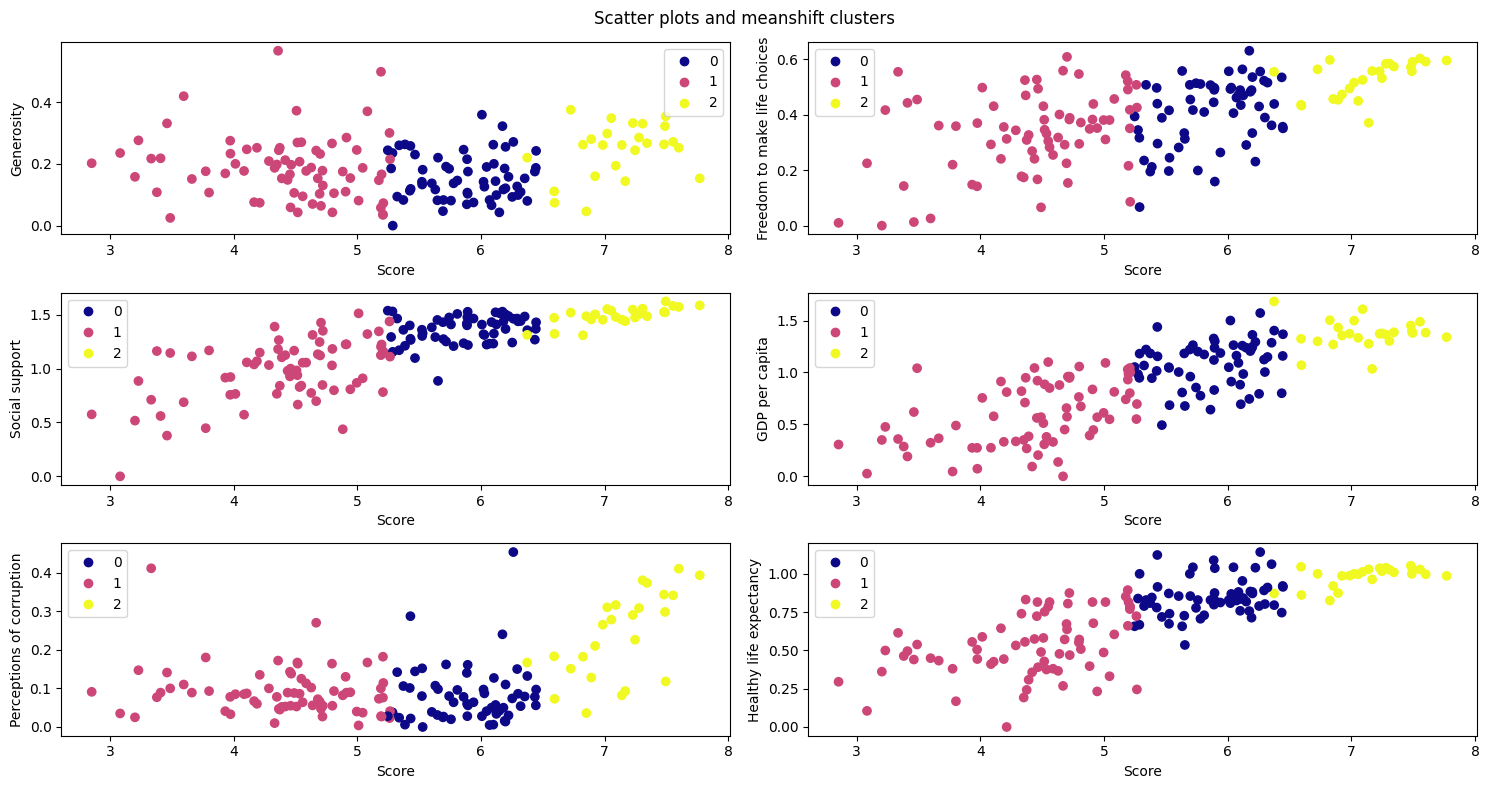

In [ ]:
fig, ax = plt.subplots(3,2)

fig.set_figheight(8)
fig.set_figwidth(15)

fig.suptitle('Scatter plots and meanshift clusters')

sct = ax[0, 0].scatter(x=X.Score, y=X.Generosity, c=mshift.labels_, cmap='plasma')
ax[0, 0].legend(handles=sct.legend_elements()[0], labels=list(np.unique(mshift.labels_).astype('str')))
ax[0, 0].set(xlabel='Score', ylabel='Generosity')

sct = ax[0, 1].scatter(x=X.Score, y=X['Freedom to make life choices'], c=mshift.labels_, cmap='plasma')
ax[0, 1].legend(handles=sct.legend_elements()[0], labels=list(np.unique(mshift.labels_).astype('str')))
ax[0, 1].set(xlabel='Score', ylabel='Freedom to make life choices')

sct = ax[1, 0].scatter(x=X.Score, y=X['Social support'], c=mshift.labels_, cmap='plasma')
ax[1, 0].legend(handles=sct.legend_elements()[0], labels=list(np.unique(mshift.labels_).astype('str')))
ax[1, 0].set(xlabel='Score', ylabel='Social support')

sct = ax[1, 1].scatter(x=X.Score, y=X['GDP per capita'], c=mshift.labels_, cmap='plasma')
ax[1, 1].legend(handles=sct.legend_elements()[0], labels=list(np.unique(mshift.labels_).astype('str')))
ax[1, 1].set(xlabel='Score', ylabel='GDP per capita')

sct = ax[2, 0].scatter(x=X.Score, y=X['Perceptions of corruption'], c=mshift.labels_, cmap='plasma')
ax[2, 0].legend(handles=sct.legend_elements()[0], labels=list(np.unique(mshift.labels_).astype('str')))
ax[2, 0].set(xlabel='Score', ylabel='Perceptions of corruption')

sct = ax[2, 1].scatter(x=X.Score, y=X['Healthy life expectancy'], c=mshift.labels_, cmap='plasma')
ax[2, 1].legend(handles=sct.legend_elements()[0], labels=list(np.unique(mshift.labels_).astype('str')))
ax[2, 1].set(xlabel='Score', ylabel='Healthy life expectancy')

plt.tight_layout()


# Conlusion

1. As we can see between these three unsupervised models two of them segment our data very good (Kmeans, Meanshift).
2. MeanShift segmented our data to three cluster otherwise Kmeans clustered our data to 8 groups.
3. We can see DBscan could not cluster data properly and clusterd so many data points as noise that is not proper for our analysis and we know that they are not noise actualy.
4. we can see overal segmentation using TSNE manifold technique that show us Kmeans and MeanShift did better that DBscan.

# Next Steps

1. We can use DBscan in bivariant analysis for detecting Noises.
2. We can use PCA for our analysis in Two dimensions.
3. We can analysis data in bivariant structure.
4. We can add corresponded countries to each groups.
5. We can analysis data of previous years and compare analyses together.
6. we can use Hyperparameters tuning (GridSearchCV and RandomizedSearchCV).